# Udacity: Self-Driving Car Engineer Nanodegree

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy as np
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load pickled data
training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'
train_dict = pickle.load(open(training_file, mode='rb') )
valid_dict = pickle.load(open(validation_file, mode='rb'))
test_dict  = pickle.load(open(testing_file, mode='rb'))

X_train, y_train = train_dict['features'], train_dict['labels']
X_valid, y_valid = valid_dict['features'], valid_dict['labels']
X_test, y_test   = test_dict['features'], test_dict['labels']

----
## Step 1: Dataset Summary

In [2]:
from data_explore_lib import data_stats
import pandas as pd


# Training set
train_data_stats = data_stats(X_train, y_train)
valid_data_stats = data_stats(X_valid, y_valid)
test_data_stats = data_stats(X_test, y_test)

n_train = train_data_stats['num_samples']
n_valid = valid_data_stats['num_samples']
n_test  = test_data_stats['num_samples']
image_shape = tuple(train_data_stats['shape_samples'][1:])
n_classes = train_data_stats['num_classes']

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of test examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


# Mapping ClassID to traffic sign names
signs = []
signnames = csv.reader(open('signnames.csv', 'r'), delimiter=',')
next(signnames,None)
for row in signnames:
    signs.append(row[1])
signs = np.array(signs)


Number of training examples = 34799
Number of validation examples = 4410
Number of test examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


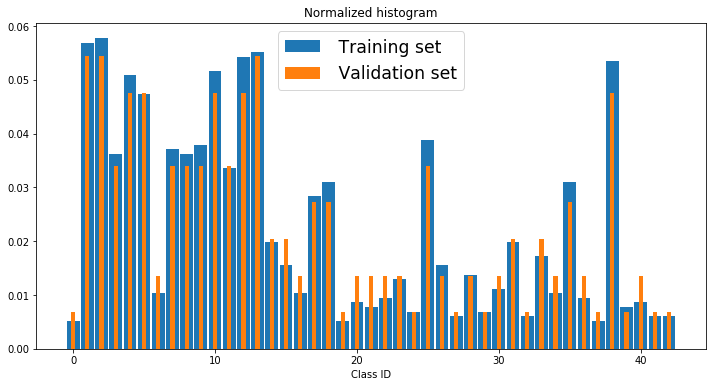

In [3]:
# Plot the histogram of 
n_classes = train_data_stats['num_classes']
fig = plt.figure(figsize=(12,6))
plt.hist(y_train, bins=np.arange(-0.5,n_classes), normed = True, rwidth = 0.9, label=' Training set')
plt.title("Normalized histogram")
plt.xlabel('Class ID')
plt.hist(y_valid, bins=np.arange(-0.5,n_classes), normed = True, rwidth = 0.3, label=' Validation set')
plt.xlabel('Class ID')
plt.legend(loc='upper center', fontsize='xx-large')
fig.savefig('class_stats_histogram_.jpg')


----
## Step 2: Dataset Visualization

Speed limit (100km/h)


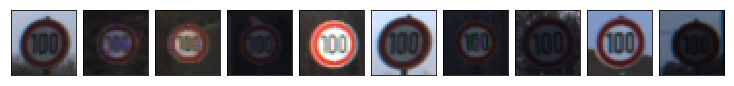

Speed limit (80km/h)


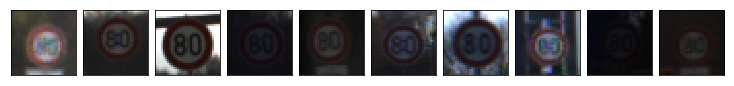

Speed limit (80km/h)


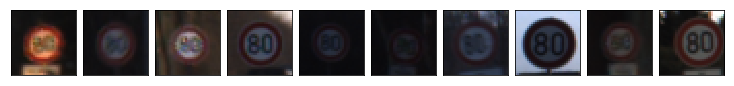

Ahead only


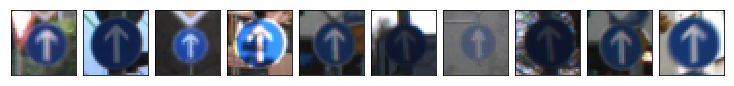

Bumpy road


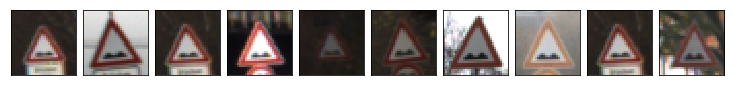

In [4]:
from img_lib import list_images, get_images_from_class, rotate_image, translate_image
from img_lib import shear_image, change_brightness_image, motion_blur_image, histogram_equalize_image

# Example images from 10 random classes
n_samples_per_class = 10
n_random_classes = 5
for i in range(n_random_classes):    
    class_id = np.random.randint(n_classes, size = 1)
    img_display = get_images_from_class(X_train, y_train, class_id, n_samples = n_samples_per_class)
    print(signs[int(class_id)])
    fname = 'train_images_class_' + str(int(class_id)) + '.jpg'
    list_images(img_display, xaxis = "", yaxis ="", cmap=None, ncols = 10, title = '', figsave = fname)    

original images


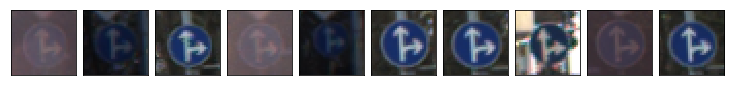

rotated images


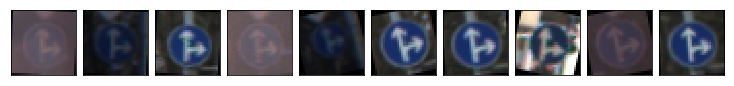

translated images


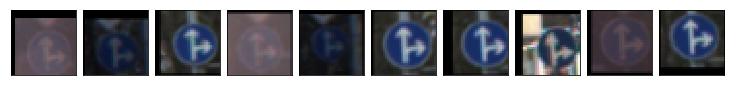

sheared images


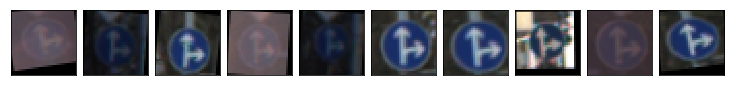

birghtness adjusted images


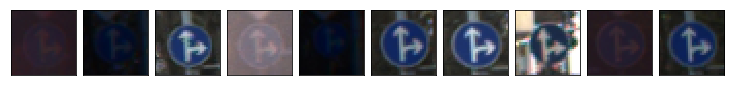

motion blurred images


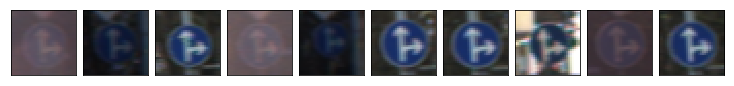

histogram equalized images


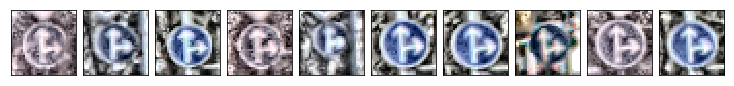

Scaled images


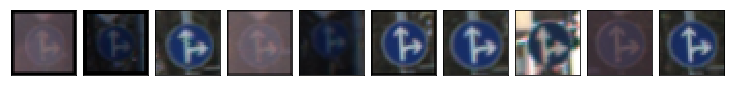

In [5]:
from img_lib import list_images, get_images_from_class, rotate_image, translate_image, scale_image
from img_lib import shear_image, change_brightness_image, motion_blur_image, histogram_equalize_image

# Example images from 10 random classes
n_samples_per_class = 10
class_id = np.random.randint(n_classes, size = 1)
img_display = get_images_from_class(X_train, y_train, class_id, n_samples = n_samples_per_class)
print('original images')
fname = 'orig_images_class_' + str(int(class_id)) + '.jpg'
list_images(img_display, xaxis = "", yaxis ="", cmap=None, ncols = 10, title = '', figsave = fname)    
print('rotated images')
fname = 'rotated_images_class_' + str(int(class_id)) + '.jpg'
list_images(np.array([rotate_image(image) for image in img_display]).reshape(img_display.shape[0], 32,32,-1)
            , xaxis = "", yaxis ="", cmap=None, ncols = 10, title = '', figsave = fname)    
print('translated images')
fname = 'translated_images_class_' + str(int(class_id)) + '.jpg'
list_images(np.array([translate_image(image) for image in img_display]).reshape(img_display.shape[0], 32,32,-1)
            , xaxis = "", yaxis ="", cmap=None, ncols = 10, title = '', figsave = fname)
print('sheared images')
fname = 'sheared_images_class_' + str(int(class_id)) + '.jpg'
list_images(np.array([shear_image(image) for image in img_display]).reshape(img_display.shape[0], 32,32,-1)
            , xaxis = "", yaxis ="", cmap=None, ncols = 10, title = '', figsave = fname)
print('birghtness adjusted images')
fname = 'birghtness_adjusted_images_class_' + str(int(class_id)) + '.jpg'
list_images(np.array([change_brightness_image(image) for image in img_display]).reshape(img_display.shape[0], 32,32,-1)
            , xaxis = "", yaxis ="", cmap=None, ncols = 10, title = '', figsave = fname)
print('motion blurred images')
fname = 'motion_blur_images_class_' + str(int(class_id)) + '.jpg'
list_images(np.array([motion_blur_image(image) for image in img_display]).reshape(img_display.shape[0], 32,32,-1)
            , xaxis = "", yaxis ="", cmap=None, ncols = 10, title = '', figsave = fname)
print('histogram equalized images')
fname = 'histogram_equalize_images_class_' + str(int(class_id)) + '.jpg'
list_images(np.array([histogram_equalize_image(image) for image in img_display]).reshape(img_display.shape[0], 32,32,-1)
            , xaxis = "", yaxis ="", cmap=None, ncols = 10, title = '', figsave = fname)
print('Scaled images')
fname = 'Scaled_images_class_' + str(int(class_id)) + '.jpg'
list_images(np.array([scale_image(image) for image in img_display]).reshape(img_display.shape[0], 32,32,-1)
            , xaxis = "", yaxis ="", cmap=None, ncols = 10, title = '', figsave = fname)



# Step-3: Train the Model


In [ ]:
from class_lenet import LeNet
from class_vgg import VGG
from generator import data_augmentation

#************************************************************
# HYPER-PARAMETERS
model_name = 'VGG' # VGG or LeNet
alpha = 1e-3 # learning rate for Adam
EPOCHS = 100
#************************************************************


n_classes = 43
if model_name == 'VGG':
    model_fname = './VGG_OptimizedModel'
    model = VGG(n_classes)
    keep_probabilities = {'keep_conv_21': 0.5, 
                          'keep_conv_22': 0.5, 
                          'keep_conv_31': 0.5,
                          'keep_conv_32': 0.5,
                          'keep_fc_1': 0.5}

else:
    model_fname = './LeNet_OptimizedModel'
    model = LeNet(n_classes)
    keep_probabilities = {'keep_fc_3': 0.5, 'keep_fc_4': 0.5}


model.compile(optimizer = tf.train.AdamOptimizer(learning_rate = alpha), activation_function = 'relu')
model.fit(x = X_train, y = y_train, batch_size = 64, 
          epochs = EPOCHS, 
          generator = data_augmentation,
          dropout_probabilities = keep_probabilities,
          validation_data = {'features': X_valid, 'labels': y_valid},
          save_trained_weights = model_fname, 
          verbose = True
         )
results = model.get_results_per_epoch()
pickle.dump(results, open( './loss_accuracy_vs_epochs_' + model_fname.split('/')[1] + '.p', "wb" ), protocol= pickle.HIGHEST_PROTOCOL)

# Step-4: Model performance, evaluation and analysis


### Accuracy/Loss vs Epochs: training and validation sets

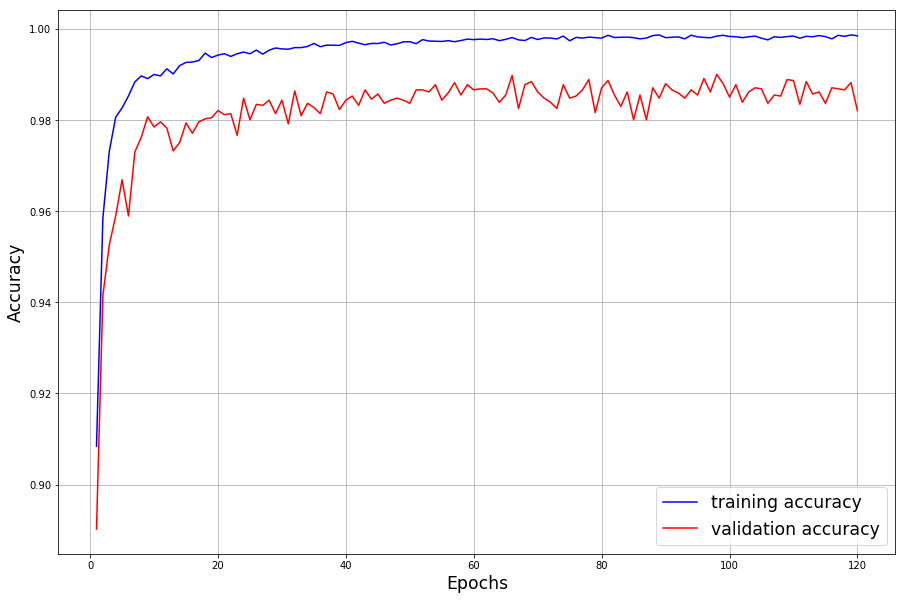

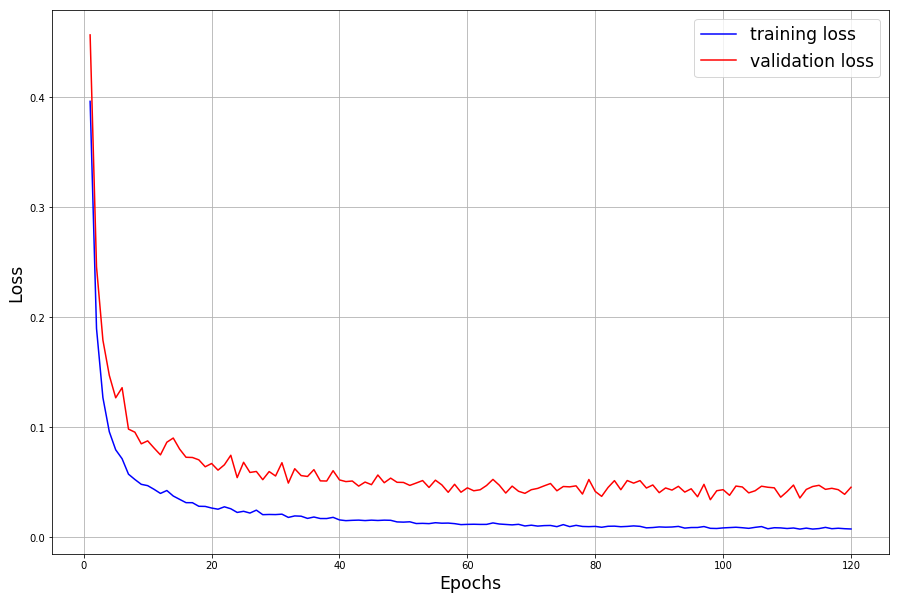

In [7]:
# Accuracy vs epochs for training and validation sets
train_model_results = pickle.load(open( './loss_accuracy_vs_epochs_' + model_fname.split('/')[1] + '.p', "rb" ) )
training_loss_per_epoch = train_model_results['training_loss']
training_accuracy_per_epoch = train_model_results['training_accuracy']
validation_accuracy_per_epoch = train_model_results['validation_accuracy']
validation_loss_per_epoch = train_model_results['validation_loss']
EPOCHS = len(training_accuracy_per_epoch)
%matplotlib inline
fig = plt.figure(figsize=(15,10))
plt.plot(np.arange(1, EPOCHS+1), training_accuracy_per_epoch, 'b', label = 'training accuracy')
plt.plot(np.arange(1, EPOCHS+1), validation_accuracy_per_epoch, 'r', label = 'validation accuracy')
plt.xlabel('Epochs', fontsize = 'xx-large')
plt.ylabel('Accuracy', fontsize = 'xx-large')
legend = plt.legend(loc='best', fontsize = 'xx-large' )
plt.grid(True)
plt.show()
fig.savefig('accuracy_vs_epochs.jpg')
# Loss vs epochs for training and validation sets
EPOCHS = len(training_loss_per_epoch)
%matplotlib inline
fig = plt.figure(figsize=(15,10))
plt.plot(np.arange(1, EPOCHS+1), training_loss_per_epoch, 'b', label = 'training loss')
plt.plot(np.arange(1, EPOCHS+1), validation_loss_per_epoch, 'r', label = 'validation loss')
plt.xlabel('Epochs', fontsize = 'xx-large')
plt.ylabel('Loss', fontsize = 'xx-large')
legend = plt.legend(loc='best', fontsize = 'xx-large' )
plt.grid(True)
plt.show()
fig.savefig('loss_vs_epochs.jpg')

### Precision, Recall and F1-score: validation and test sets

In [8]:
# Evaluate model on vaidation and test sets for precision, recall, loss and accuracy
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess,  model_fname)
    train_results  = model.evaluate(model.preprocess_data(X_train), y_train)
    valid_results  = model.evaluate(model.preprocess_data(X_valid), y_valid)        
    test_results   = model.evaluate(model.preprocess_data(X_test), y_test)
    
    train_precision = train_results['precision']
    train_recall    = train_results['recall']
    train_f1score   = train_results['F1score']

    valid_precision = valid_results['precision']
    valid_recall    = valid_results['recall']
    valid_f1score   = valid_results['F1score']

    test_precision = test_results['precision']
    test_recall    = test_results['recall']
    test_f1score   = test_results['F1score']  


INFO:tensorflow:Restoring parameters from ./VGG_OptimizedModel


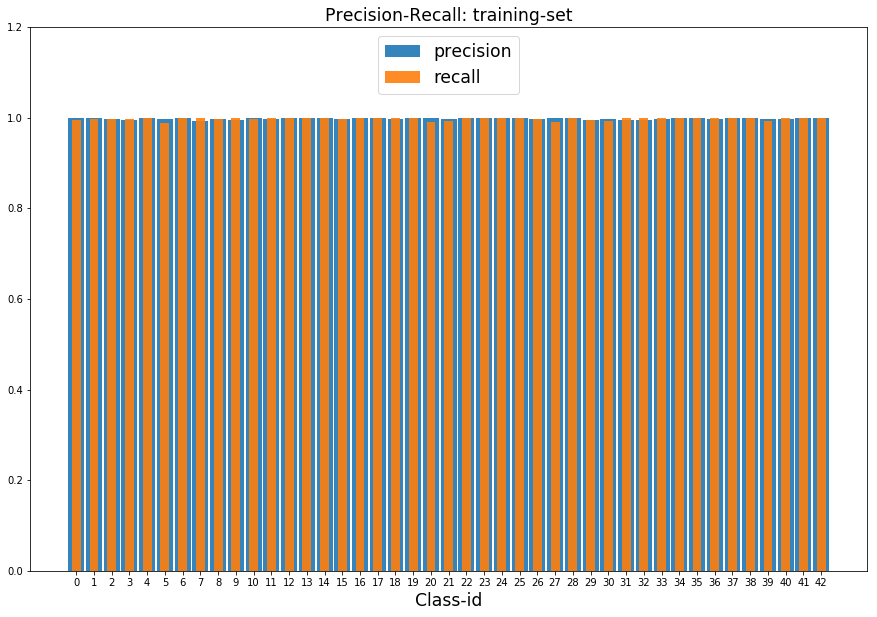

In [9]:
# Precision-recall for training set
fig = plt.figure(figsize=(15,10))
y_pos = np.arange(len(train_precision))
plt.bar(y_pos, train_precision, alpha=0.9, width = 0.9, label = 'precision')
plt.bar(y_pos, train_recall, alpha=0.9, width = 0.5, label = 'recall')
#plt.bar(y_pos, test_f1score, alpha=0.9, width = 0.2, label = 'f1-score')
plt.xticks(y_pos)
plt.ylim((0, 1.2))
plt.xlabel('Class-id', fontsize = 'xx-large')
plt.title('Precision-Recall: training-set', fontsize = 'xx-large')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()
fig.savefig('Precision-Recall-training.jpg')


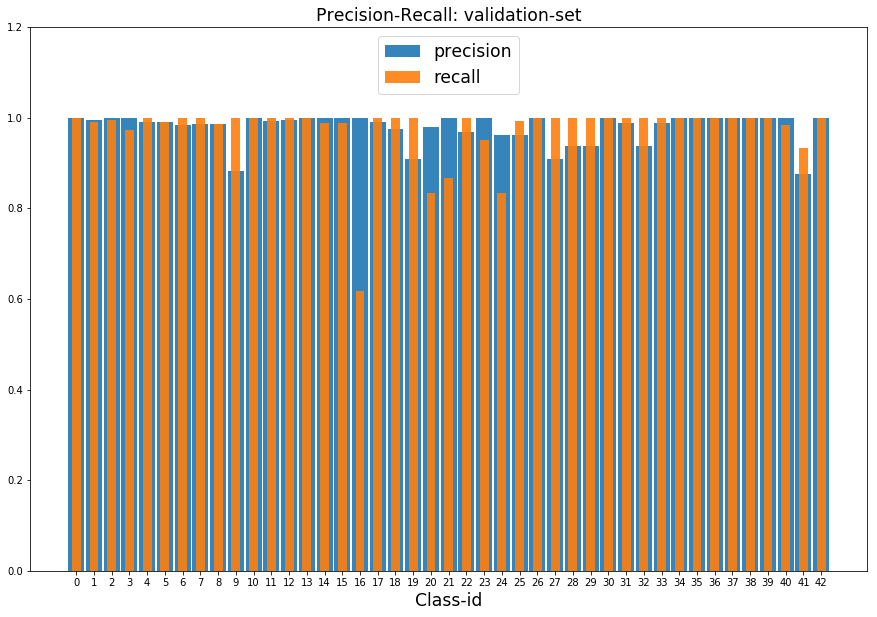

In [10]:
# Precision-recall for Valid set
fig = plt.figure(figsize=(15,10))
y_pos = np.arange(len(valid_precision))
plt.bar(y_pos, valid_precision, alpha=0.9, width = 0.9, label = 'precision')
plt.bar(y_pos, valid_recall, alpha=0.9, width = 0.5, label = 'recall')
#plt.bar(y_pos, test_f1score, alpha=0.9, width = 0.2, label = 'f1-score')
plt.xticks(y_pos)
plt.ylim((0, 1.2))
plt.xlabel('Class-id', fontsize = 'xx-large')
plt.title('Precision-Recall: validation-set', fontsize = 'xx-large')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()
fig.savefig('Precision-Recall-validation.jpg')

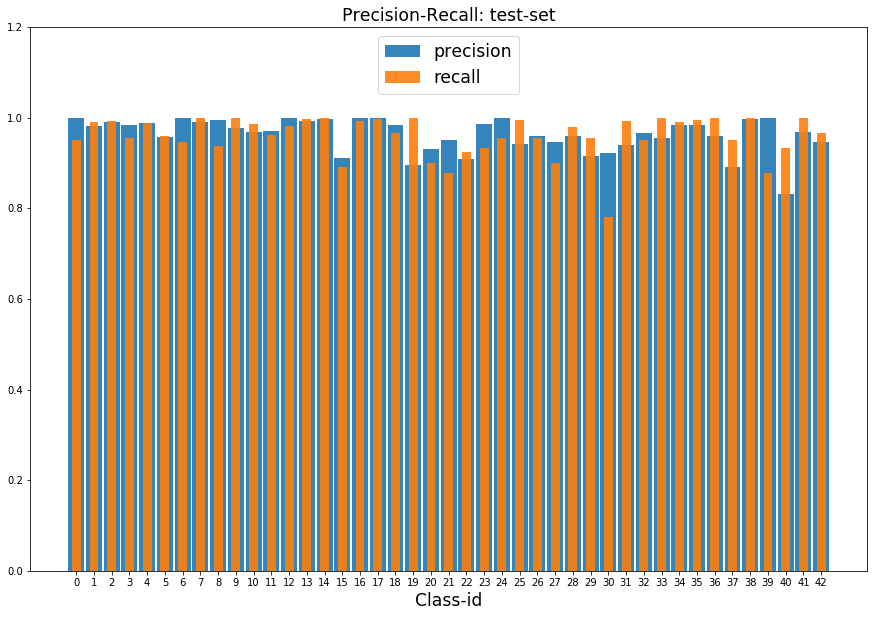

In [11]:
# Precision-recall for test set
fig = plt.figure(figsize=(15,10))
y_pos = np.arange(len(test_precision))
plt.bar(y_pos, test_precision, alpha=0.9, width = 0.9, label = 'precision')
plt.bar(y_pos, test_recall, alpha=0.9, width = 0.5, label = 'recall')
#plt.bar(y_pos, test_f1score, alpha=0.9, width = 0.2, label = 'f1-score')
plt.xticks(y_pos)
plt.ylim((0, 1.2))
plt.xlabel('Class-id', fontsize = 'xx-large')
plt.title('Precision-Recall: test-set', fontsize = 'xx-large')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()
fig.savefig('Precision-Recall-test.jpg')


# Final performance numbers on Test, Validation and Test set

In [16]:
print("training accuracy = {:.2f}".format(train_results["accuracy"]))
print("validation accuracy = {:.2f}".format(valid_results["accuracy"]))
print("test accuracy = {:.2f}".format(test_results["accuracy"]))

training accuracy = 1.00
validation accuracy = 0.99
test accuracy = 0.98
